# Tasks - Neural Dense Networks

### 1. Familiarize yourself with the Sklearn lib functionality
### 2. Select your task, based on Table below
### 3. Fit the target using Linear Regression (LR) → Use sklearn LinearRegression Remember this results as the baseline. **Plot learning curves.
### 4. Fit the target using Polynomial Regression.
### 5. Present accuracy, and the same loss function = MSE (for example).
### 6.Calculate other metrics like RMSE, R2, etc. Analize them.
### 7. Plot learning curves (R2, MAPE, MSE - Loss function)

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Familiarize yourself with the Sklearn lib functionality

In [356]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#### 2. Select your task, based on Table below

In [357]:
from sklearn.datasets import make_friedman2

#first need to load dataset
friedman_X, friedman_y = make_friedman2(random_state=42)

#visualize the dataset to understand the data
df = pd.DataFrame(friedman_X,columns=[f"feature_{i}" for i in range(friedman_X.shape[1])])
df["target"] = friedman_y
df.head(5)

,feature_0,feature_1,feature_2,feature_3,target
0,37.454012,1678.777388,0.731994,6.986585,1229.425437
1,15.601864,380.500750,0.058084,9.661761,27.052801
2,60.111501,1282.391023,0.020584,10.699099,65.652189
3,83.244264,472.546861,0.181825,2.834045,119.632212
4,30.424224,982.920600,0.431945,3.912291,425.656091


#### 3. Fit the target using Linear Regression (LR) → Use sklearn LinearRegression Remember this results as the baseline. **Plot learning curves.

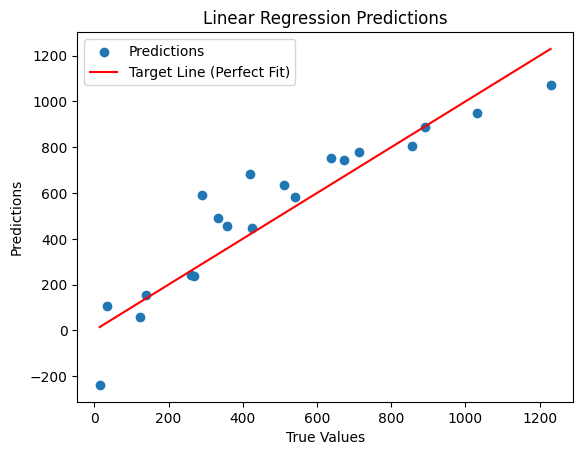

Linear Regression (LR) Results:
MSE:  17226.792506548463
RMSE:  131.25087621249796
R2 Score:  0.8379530824887
MAPE:  118.3180096199091


In [358]:

#load dataset makefriedman2
friedman_X, friedman_y = make_friedman2(random_state=42)

#split the dataset into train and test
# src: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
friedman_X_train, friedman_X_test, friedman_y_train, friedman_y_test = train_test_split(friedman_X, friedman_y, test_size=0.20,random_state=42)

#create linear regression model
lr = LinearRegression()

#train regModel with training set
lr.fit(friedman_X_train, friedman_y_train)

#make predictions with using testing set
friedman_y_predictions = lr.predict(friedman_X_test)

#plot the predictions
plt.scatter(friedman_y_test, friedman_y_predictions, label="Predictions")
plt.plot([min(friedman_y_test), max(friedman_y_test)],
         [min(friedman_y_test), max(friedman_y_test)],
         color="red", label="Target Line (Perfect Fit)")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

#calculate the metrics for lr
mse_lr = mean_squared_error(friedman_y_test, friedman_y_predictions)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(friedman_y_test, friedman_y_predictions)

#Funktion für MAPE src: https://www.statology.org/mape-python/
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape_lr = mape(friedman_y_test, friedman_y_predictions)

print("Linear Regression (LR) Results:")
print("MSE: ", mse_lr)
print("RMSE: ", rmse_lr)
print("R2 Score: ", r2_lr)
print("MAPE: ", mape_lr)



#### 4. Fit the target using Polynomial Regression.

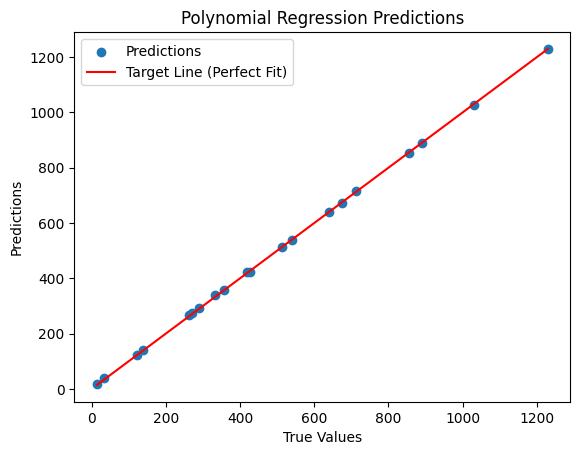

Polynomial Regression Results:
MSE:  10.84641960357079
RMSE:  3.293390290198049
R2 Score:  0.999897971206066
MAPE:  3.239796173980948


In [359]:

#create polynomial features
poly_features = PolynomialFeatures(degree=2)
#put the features into polynomial
friedman_X_poly = poly_features.fit_transform(friedman_X)

#split the dataset into train and test
# src: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
friedman_X_train_poly, friedman_X_test_poly, friedman_y_train, friedman_y_test = train_test_split(friedman_X_poly, friedman_y, test_size=0.20,random_state=42)


lr_poly = LinearRegression()
lr_poly.fit(friedman_X_train_poly, friedman_y_train)
friedman_y_pred_poly = lr_poly.predict(friedman_X_test_poly)

#plot the predictions
plt.scatter(friedman_y_test, friedman_y_pred_poly, label="Predictions")
plt.plot([min(friedman_y_test), max(friedman_y_test)],
         [min(friedman_y_test), max(friedman_y_test)],
         color="red", label="Target Line (Perfect Fit)")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()



#calculate the metrics for lr-poly
mse_poly = mean_squared_error(friedman_y_test, friedman_y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(friedman_y_test, friedman_y_pred_poly)
mape_poly = mape(friedman_y_test, friedman_y_pred_poly)
print("Polynomial Regression Results:")
print("MSE: ", mse_poly)
print("RMSE: ", rmse_poly)
print("R2 Score: ", r2_poly) # -> might be overfitting
print("MAPE: ", mape_poly)









#### 6. Plot Learning Curves

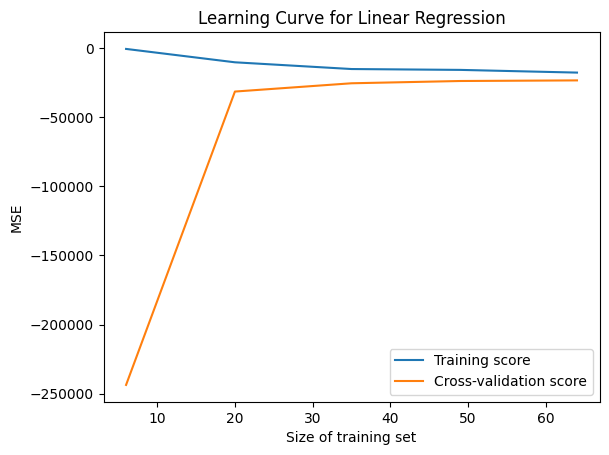

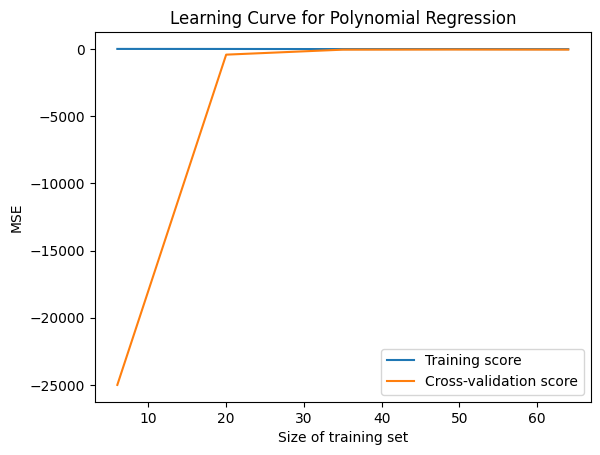

In [360]:
from sklearn.model_selection import learning_curve
#src: https://scikit-learn.org/stable/modules/learning_curve.html
#src: https://www.kaggle.com/code/shreedevi/learning-curve


train_sizes = np.linspace(0.1, 1.0, 5) #just uses default?

#Learning curve for linear regression
train_sizes, train_scores, validation_scores = learning_curve(
    lr,
    friedman_X_train,
    friedman_y_train,
    train_sizes=train_sizes,
    scoring='neg_mean_squared_error',
    cv=5,
)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =  1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
plt.xlabel("Size of training set")
plt.ylabel("MSE")
plt.title("Learning Curve for Linear Regression")
plt.legend()

#Learning curve for polynomial regression
train_sizes, train_scores, validation_scores = learning_curve(
    lr_poly,
    friedman_X_train_poly,
    friedman_y_train,
    train_sizes = train_sizes,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

train_scores_mean = train_scores.mean(axis =  1)
validation_scores_mean = validation_scores.mean(axis =  1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
plt.xlabel("Size of training set")
plt.ylabel("MSE")
plt.title("Learning Curve for Polynomial Regression")
plt.legend()


##### 1. What is a Linear Regression Algorithm?
##### - supervised learning algorithm; trying to predict the relationship between one and more independant variables and a dependent variable
##### 2. What is the Polynomial Regression Algorithm? What is the Key difference with Linear Regression?
##### - almost same; it models its relationship between independant and dependant variable as polynomial; is working with non-linear data
##### 3. What is the difference between simple linear and multiple linear regressions?
###### simple: - nur ein Eingangsvariable (only 1 Feature)
###### multiple: - mehrere Eingangsvariablen (multiple Features) -> trying to predict the target variable using multiple features
##### 4. What models and combinations of hyper-parameters worked best? Why?
###### - PL with degree 2 worked best, because it can also work with non-linear data and linear data -> this data set was non-linear
##### 5. Influence of optimizer?
##### - algorithm , that adjust the model parameters during the training to minimize the loss function
##### 6. Influence of learning rate?
##### - important to determine how fast the model learns with each iteration
##### 7. Influence of DNN architecture (number of layers)?
##### - more layers = more complex model, but also more prone to overfitting
##### 8. Influence of data distribution (linear or non-linear?)
##### - important, bc some models are better suited for linear data and some for non-linear data
##### - linear data = linear regression; non-linear data = polynomial regression
##### 9. What evaluation metrics do you know?
##### - MSE, RMSE, R2, MAPE
##### 10. How to compute R2?
##### - R2 =
